# **Lab Assignment**
## Name: Awez Sheikh
## Batch: A2
## Roll No: 32

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv("/content/Iris - Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      variety
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            variety  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [ ]:
df.shape        # Dimensions

(150, 6)

In [ ]:
df.groupby('variety').size()

,0
variety,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# Describes the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 640x480 with 0 Axes>

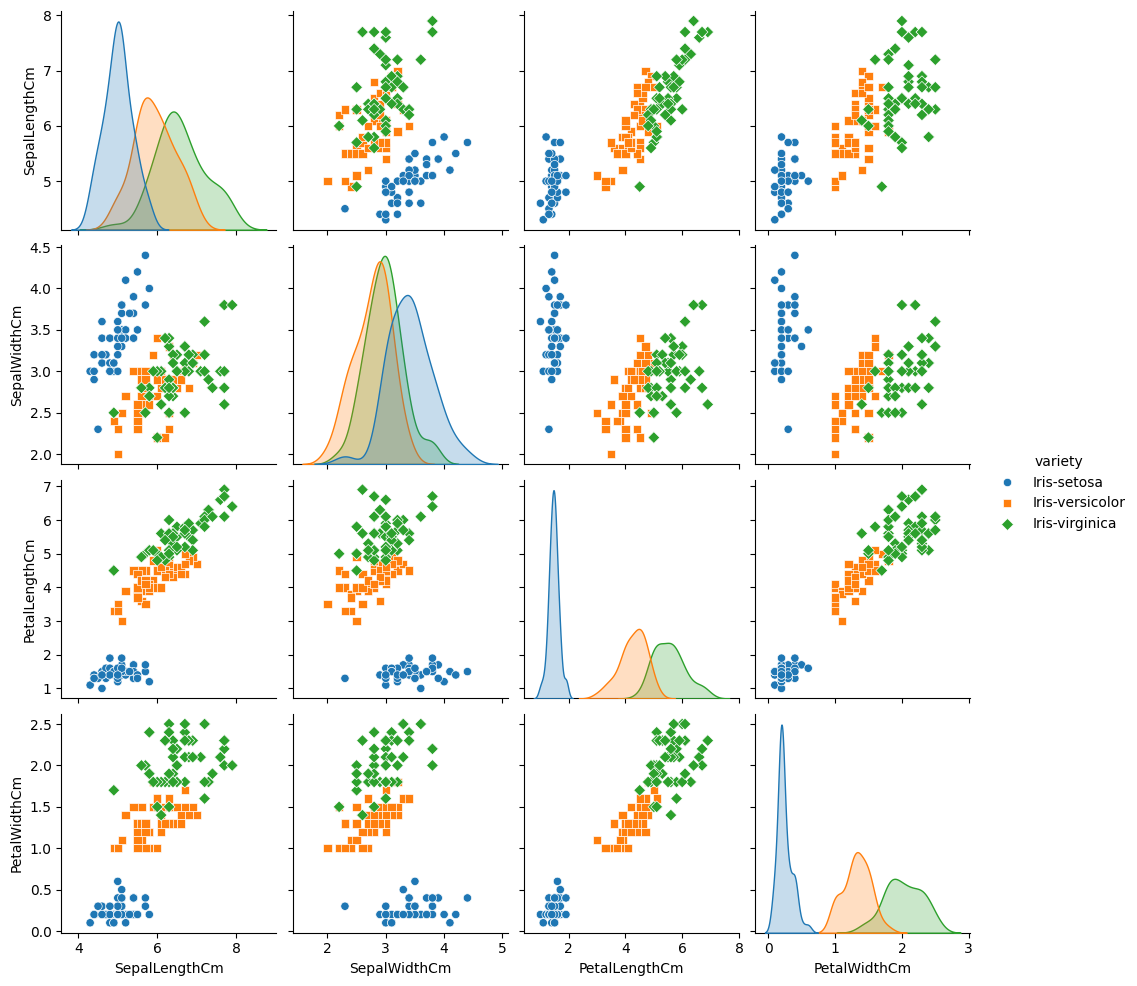

In [ ]:
plt.figure()
sns.pairplot(df.drop("Id", axis = 1), hue = "variety", markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

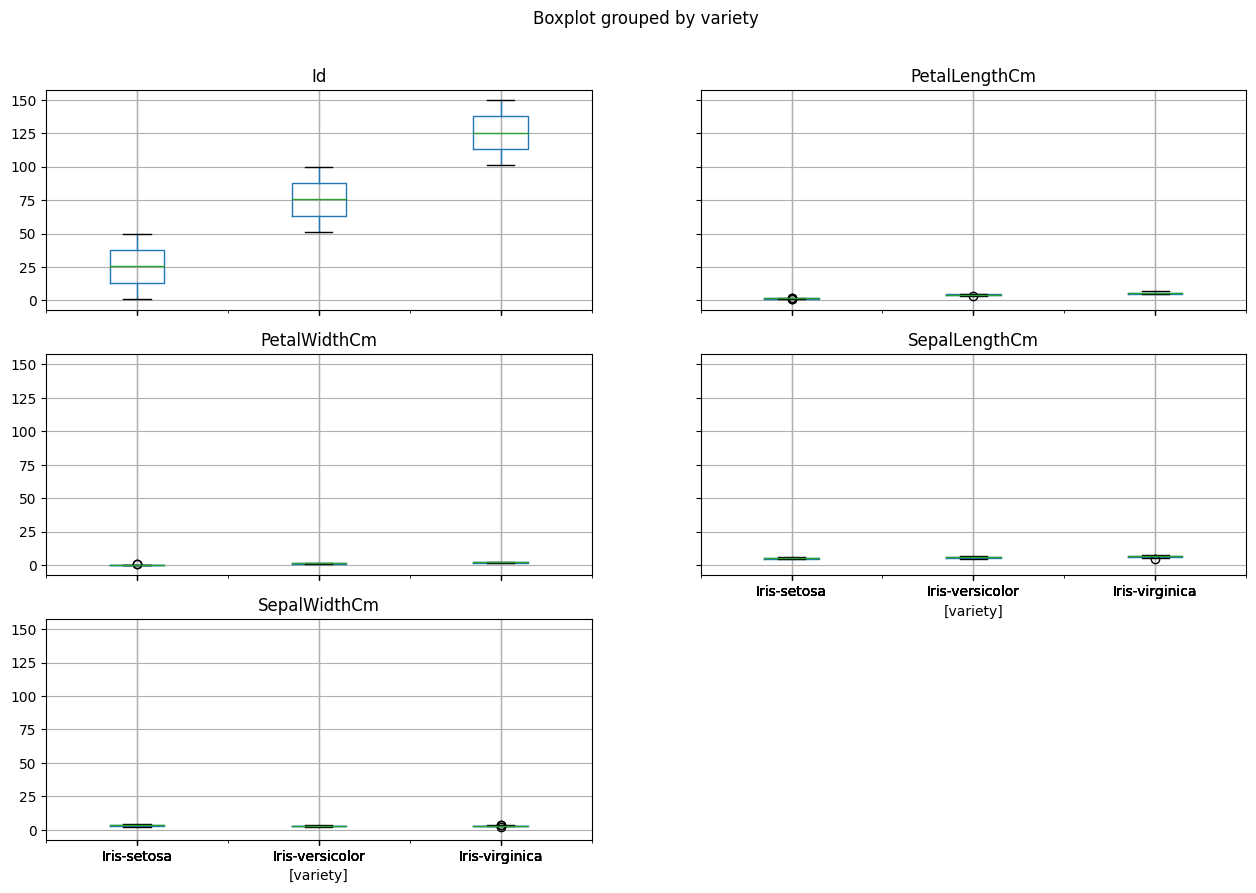

In [ ]:
plt.figure()
df.boxplot(by="variety", figsize=(15,10))
plt.show()

In [ ]:
#Create featuer and target arrays
X = df.drop(['Id', 'variety'], axis = 'columns')

# y = df.variety
y = df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 'columns') # Corrected column names to 'PetalLengthCm' and 'PetalWidthCm'

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


### Now we need to take the instance of the classifier and then we have to train it.
### Next for testing we need to pass the X value and check the correspoding y value

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#instantiate learning model (k=3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score: 100.00%


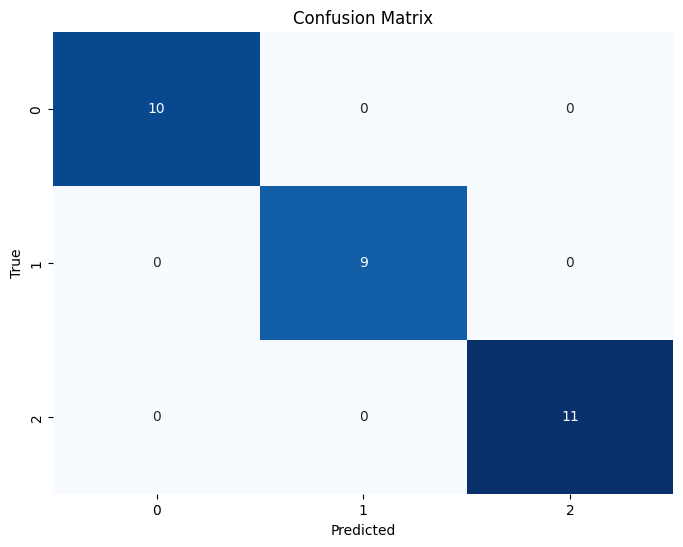

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

# Visualize the confusion matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Additional Metrics ---

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Visualizing KNN Decision Boundaries ---

import numpy as np
from matplotlib.colors import ListedColormap

# Visualize the decision boundary for the test set (if feature space is 2D)
def plot_decision_boundary(X, y, model):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('K-NN Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Visualizing decision boundaries if the feature space is two-dimensional
if X_train.shape[1] == 2:
    plot_decision_boundary(X_train, y_train, knn)


In [ ]:
def predict_iris():
  try:
    SepalLengthCm = float(input("Enter SepalLengthCm: "))
    SepalWidthCm = float(input("Enter SepalWidthCm: "))
    PetalLengthCm = float(input("Enter PetalLengthCm: "))
    PetalWidthCm = float(input("Enter PetalWidthCm: "))

    # Creating a numpy array for the input
    user_input = np.array([SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]).reshape(1, -1) # Reshape for single sample prediction

    # Making predictino using the classifier
    prediction = classifier.predict(user_input)  # Use the 'classifier' variable

    # Mapping teh prediction (usually encoded as 0,1,2 representing species)
    species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'} # Corrected indentation
    predicted_species = species_map[prediction[0]]

    # Display the result to the user
    print(f"Prediction: The flower is likely to be '{predicted_species}'.")

  except ValueError:
    print("Invalid input. Please enter valid numeric values for each feature.")
  except Exception as e:
    print(f"An error occurred: {e}")

predict_iris()

Enter SepalLengthCm: 5.1
Enter SepalWidthCm: 3.5
Enter PetalLengthCm: 1.4
Enter PetalWidthCm: 0.2
An error occurred: 'Iris-setosa'


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
